## Installments and Imports

In [22]:
# Uncomment if necessary!
!pip install -r requirements.txt
!pip install eep153_tools

In [23]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cfe

## Acquire DataFrames



In [24]:
# Taken from the Steps notebook
# Load Philippines data (Bukidnon 2003)
sheet = '1KjQu6ngxR_qxETh9Wx9f9ZmijMVkkevV'

# InputFiles = {'Expenditures':(sheet,'Expenditures'),
#               'Consumption':(sheet,'Quantities'),
#               'HH Characteristics':(sheet,'HH Characteristics'),
#               'FCT':(sheet,'FCT')}

quant = pd.read_excel('Bukidnon 2003.xlsx',sheet_name='Quantities')
hh = pd.read_excel('Bukidnon 2003.xlsx',sheet_name='HH Characteristics')
expend = pd.read_excel('Bukidnon 2003.xlsx',sheet_name ='Expenditures')
nut = pd.read_excel('Bukidnon 2003.xlsx',sheet_name='FCT')

In [25]:
# Clean data
def get_clean_sheet(df):

    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(expend)

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(hh)

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get purchased consumption quantities
q = get_clean_sheet(quant)

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

fct = get_clean_sheet(nut)

fct.index.name = 'i'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

## Estimate Demand System



In [26]:
result = cfe.Result(y=np.log(x),z=z)

# Get reduced form linear regression
result.get_reduced_form()

# Get delta coefficients 
result.delta.to_dataframe().unstack('k')

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning:

No variation in: (2003.0, 'Bukidnon')

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:447: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:451: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning:

No variation in: (2003.0, 'Bukidnon')

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:447: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:451: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

delta                                   \
k                             Males 0-1 Males 1-5 Males 5-10 Males 10-15   
i                                                                          
Bagoong                       -0.052586  0.089283   0.065798    0.011462   
Banana                         0.278559  0.272695   0.196990    0.316267   
Beef                           0.244980  0.050033  -0.042359    0.088629   
Carrots                        0.183419  0.165941  -0.061971   -0.163690   
Chicken                        0.018365  0.035918   0.147542   -0.143412   
Coffee                        -0.058852  0.038269   0.231706    0.160834   
Cooking oil                   -0.091010  0.017945   0.018754    0.053295   
Eggs                           0.019769  0.066225   0.367595    0.102196   
Food made from flour           0.434690  0.293566   0.090052    0.042008   
Fresh fish                     0.130574  0.010539   0.053574   -0.005981   
Mangoes                       -0.397406 -0.084732   0.241306    0.127841   
Milk                           0.820564  0.361618   0.103016    0.066093   
Milo                           0.460210  0.247974   0.299534   -0.003649   
Mongo and other products       0.009415  0.107997   0.117028    0.155551   
Onions                        -0.045512  0.097334   0.150064    0.027315   
Peanut                         0.488951  0.043896  -0.020618    0.263970   
Pork                          -0.017141  0.105049   0.102637   -0.061391   
Potato                         0.006234  0.180211   0.085991    0.040708   
Processed meat like longanisa  0.431187  0.165657   0.041557    0.063137   
Rice                          -0.065102  0.026028   0.080856   -0.073210   
Salt                           0.064970 -0.003386   0.071360    0.032116   
Sardines                       0.017602 -0.084372   0.046664    0.126609   
Sea weed                       0.413241  0.064980   0.019803   -0.153630   
Soybean and other products    -0.047680  0.076096   0.212107    0.159771   
Squash                         0.294856 -0.068069   0.176868    0.139939   
Sugar                          0.136165  0.085078   0.151161    0.045844   
Sweet potato                   0.024748  0.020639   0.262147    0.126730   
Talong                        -0.413523  0.140420   0.241164    0.087196   
Tomatoes                      -0.041397  0.027062   0.067845    0.060910   

                                                                               \
k                             Males 15-20 Males 20-30 Males 30-50 Males 50-60   
i                                                                               
Bagoong                          0.056962    0.055763    0.052315    0.150561   
Banana                          -0.076913    0.146409   -0.026650    0.064513   
Beef                            -0.030781    0.093310    0.192749    0.410474   
Carrots                         -0.001757   -0.186753   -0.081557   -0.288267   
Chicken                         -0.048649   -0.009357   -0.019813   -0.051411   
Coffee                           0.064147    0.123887    0.113672    0.192744   
Cooking oil                     -0.086268    0.079796    0.063100   -0.123169   
Eggs                             0.029464    0.096920    0.083571    0.147147   
Food made from flour            -0.003291    0.088140    0.075945    0.246012   
Fresh fish                      -0.029088    0.096910    0.168922    0.080256   
Mangoes                         -0.164210    0.231745   -0.132155   -0.496802   
Milk                             0.020440    0.076477    0.107197   -0.142064   
Milo                            -0.119407    0.084963    0.053232   -0.069152   
Mongo and other products         0.070669    0.038451    0.080071   -0.232250   
Onions                          -0.002401    0.112359    0.163205    0.107409   
Peanut                           0.000398   -0.111416    0.266655    0.656198   
Pork                             0.058725    0.151612    0.139

In [27]:
# Get good-time a constants (capture effect of prices)
acs = result.a.to_dataframe().unstack('i').loc[2003,'Bukidnon'].loc['a'].sort_values(ascending=False)
acs

i
Rice                             4.720102
Fresh fish                       3.445259
Beef                             3.403645
Milk                             3.245843
Pork                             3.209545
Food made from flour             3.068056
Processed meat like longanisa    2.860870
Mangoes                          2.730812
Eggs                             2.704676
Milo                             2.639543
Banana                           2.579405
Chicken                          2.407365
Sugar                            2.346172
Cooking oil                      2.311288
Coffee                           2.206140
Potato                           2.201080
Sweet potato                     2.134163
Soybean and other products       2.064843
Squash                           2.006581
Sardines                         1.969825
Mongo and other products         1.907637
Onions                           1.864569
Talong                           1.778438
Sea weed                        

In [28]:
# Get beta factors (Frisch elasticities - how demand changes as household Marginal Utility of Expenditures falls)
beta = result.get_beta(as_df=True).sort_values(ascending=False) 
px.bar(beta)

## Infer prices



In [29]:
# Estimates most things (not counting std errors for betas).
xhat = result.get_predicted_expenditures() 

# xhat is an xarray; change to df
xhatdf = xhat.to_dataset('i').to_dataframe()
xhatdf.columns.name ='i'

phat = xhatdf/q

# Keep gram unit
phat = phat.xs('g',level='u').groupby(['t','m']).median().T.dropna(how='all')
result['prices'] = phat.stack().to_xarray().to_array()

# Make this persistent...
result.to_dataset('./BUK.ds')

<xarray.Dataset>
Dimensions:           (j: 572, i: 29, k: 19, variable: 1, m: 1, t: 1, kp: 19)
Coordinates:
  * j                 (j) float64 2.0 4.0 5.0 6.0 ... 938.0 939.0 940.0 941.0
  * t                 (t) float64 2.003e+03
  * m                 (m) object 'Bukidnon'
  * i                 (i) object 'Bagoong' 'Banana' ... 'Talong' 'Tomatoes'
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log HSize'
  * kp                (kp) <U14 'Males 0-1' 'Males 1-5' ... 'log HSize'
  * variable          (variable) float64 2.003e+03
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.2534 0.5821 0.4597 ... 0.2713 0.5006 0.4771
    delta             (k, i) float64 -0.05259 0.2786 0.245 ... -0.4271 -0.4551
    prices            (variable, i, m) float64 0.03719 0.0214 ... 0.02372
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.792 1.386 1.099
    loglambdas        (j, t, m) float64 -0.6325 -1.442 1.418 ... -1.05 -1.058
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.03899 0.05199 ... 0.05059 0.04981
    y                 (i, j, t, m) float64 nan 2.89 -0.2877 ... 1.792 nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.792 1.386 1.099

## Compute Demand

In [30]:
# Taken from Example_demands notebook
t = result.firstround  # First round
m = result.coords['m'][0] # First market

x = result.get_predicted_expenditures().sum('i')
x = x.where(x>0).sel(t=t,m=m).median('j') # Budget (median household)`

# Note selection of prices for 1975 for market A
p = result.prices.sel(m=m).fillna(1).copy()
p = p.to_dataframe().fillna(1).squeeze().loc[2003,:]['prices']

# Compute and plot demand
c = result.demands(x,p).sort_values(ascending=False)
px.bar(c)

## Analsis: Demand Curves & Engel Curves

Text(0, 0.5, 'Price')

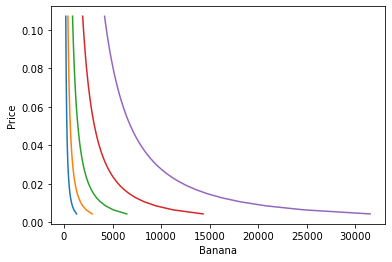

In [31]:
# Trace a demand curve
%matplotlib inline

USE = 'BUK'
USE_GOOD = 'Banana'
    
# Values for prices
ref_price = result.prices.sel(i=USE_GOOD,m=m)
P = np.linspace(ref_price/5,ref_price*5,50)

def my_prices(p0,p=p,i=USE_GOOD):
    p = p.copy()
    p.loc[i] = p0
    return p

for myx in [x*s for s in [.25,.5,1.,2,4]]:
    plt.plot([result.demands(myx,my_prices(p0))[USE_GOOD] for p0 in P],P)

plt.xlabel(USE_GOOD)
plt.ylabel('Price')

Text(0.5, 0, 'Budget')

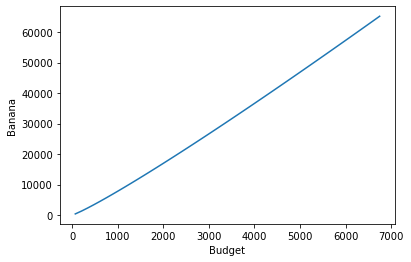

In [32]:
# Trace Engel curves
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

USE_GOOD = 'Banana'
    
# Values for prices
ref_price = result.prices.sel(i=USE_GOOD,m=m)

# Range of budgets to consider
X = np.linspace(x/10,x*10,50)

plt.plot(X,[result.demands(x,ref_price)[USE_GOOD] for x in X])

plt.ylabel(USE_GOOD)
plt.xlabel('Budget')

## Assessment of Fit

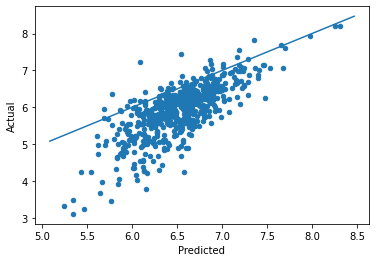

In [33]:
# Compare total expenditures predicted by the model vs. actual total expenditures
xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

## Predicting Positive Consumption



/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning:

No variation in: (2003.0, 'Bukidnon')

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:447: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:451: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning:

No variation in: (2003.0, 'Bukidnon')

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:447: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:451: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

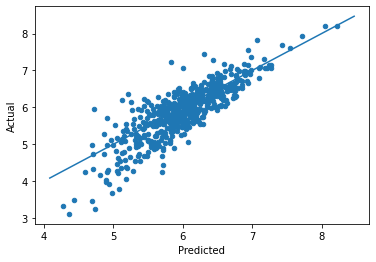

In [45]:
%matplotlib inline

zeros_r = cfe.Result(y=(0.+(np.exp(result.y)>0)),z=result.z)
weights = zeros_r.get_predicted_log_expenditures()

# Truncate to make weights live in [0,1]
weights = weights.where((weights<1) + np.isnan(weights),1).where((weights>0) + np.isnan(weights),0)

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

# Calculate *expected* predicted expenditures, to make unconditional on being positive
xhat = (weights*result.get_predicted_expenditures())
xsum = xhat.sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xsum)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

## Get predicted quantities



In [35]:
# Put predictions into a dataframe
xhatdf = xhat.to_dataset('i').to_dataframe()
xhatdf.columns.name ='i'

qhat = xhatdf.div(phat.T,axis=1)

qhat

i                         Bagoong      Banana        Beef     Carrots  \
t      m        j                                                       
2003.0 Bukidnon 2.0    123.277688  850.214334  196.981949  191.178690   
                4.0    242.375199  330.051199  146.401044   34.999183   
                5.0     77.905900   45.836093   11.546506    7.761824   
                6.0    384.409102  448.856141  250.635023  223.428383   
                12.0   229.149223  532.739486  583.642386  125.559773   
...                           ...         ...         ...         ...   
                937.0  131.246033  355.623544   91.098652   64.152724   
                938.0  167.381405  251.272911   59.627347   56.331792   
                939.0   63.862554   55.497476   18.812802    9.143685   
                940.0  176.607493  336.553919  123.111660  101.106191   
                941.0  150.310959  283.164538   58.021525   38.057269   

i                         Chicken     Coffee  Cooking oil        Eggs  \
t      m        j                                                       
2003.0 Bukidnon 2.0    259.307919  14.324950   603.767951  254.625194   
                4.0    265.202504  19.530460   559.122723  198.424425   
                5.0      5.784572   4.323569   160.073812   38.581272   
                6.0    629.637437  20.261516   743.796362  333.605303   
                12.0   369.313039  14.497976   558.913486  216.271294   
...                           ...        ...          ...         ...   
                937.0  121.063915  10.247306   342.184972  157.883320   
                938.0   76.069555  11.344264   338.026575  135.869604   
                939.0   12.496059   3.247711   118.021282   29.561303   
                940.0  166.073572  11.185103   545.178908  245.531367   
                941.0  109.728127  15.607965   486.817486  199.401681   

i                      Food made from flour   Fresh fish  ...          Rice  \
t      m        j                                         ...                 
2003.0 Bukidnon 2.0             2295.516093  1525.288955  ...   9090.625247   
                4.0             2819.263076  2163.911433  ...  10701.025609   
                5.0              804.976385   473.548183  ...   3445.447589   
                6.0             4442.594016  3541.427351  ...   7271.595071   
                12.0            4003.661435  3516.323478  ...   7196.446665   
...                                     ...          ...  ...           ...   
                937.0           1933.981781  1140.214860  ...   6633.450450   
                938.0           2270.255947  1404.183111  ...   6561.498858   
                939.0            601.550511   338.740462  ...   4657.115537   
                940.0           2577.896312  1931.688034  ...   7241.356750   
                941.0           2655.242479  1582.761567  ...   5342.301089   

i                            Salt    Sardines    Sea weed  \
t      m        j                                           
2003.0 Bukidnon 2.0    313.063715  234.096755   51.833135   
                4.0    264.707510  252.230151   84.322818   
                5.0    112.452340   63.951191   11.513133   
                6.0    374.024601  528.954264  283.999133   
                12.0   306.918559  350.490553  205.104849   
...                           ...         ...         ...   
                937.0  197.067116  171.369174   88.230909   
                938.0  243.666390  207.005942   78.947204   
                939.0  132.992167   97.932689    5.829005   
                940.0  245.209220  263.973995  105.364588   
                941.0  249.884752  201.172964   86.444048   

i                      Soybean and other products      Squash        Sugar  \
t      m        j                                                            
2003.0 Bukidnon 2.0                    377.772101  396.557036   978.711656   
                4.0                    387.3

## Map predicted quantities into nutrients



In [36]:
print(pd.Series(xhat.coords['i']).to_markdown())

|    | 0                             |
|---:|:------------------------------|
|  0 | Bagoong                       |
|  1 | Banana                        |
|  2 | Beef                          |
|  3 | Carrots                       |
|  4 | Chicken                       |
|  5 | Coffee                        |
|  6 | Cooking oil                   |
|  7 | Eggs                          |
|  8 | Food made from flour          |
|  9 | Fresh fish                    |
| 10 | Mangoes                       |
| 11 | Milk                          |
| 12 | Milo                          |
| 13 | Mongo and other products      |
| 14 | Onions                        |
| 15 | Peanut                        |
| 16 | Pork                          |
| 17 | Potato                        |
| 18 | Processed meat like longanisa |
| 19 | Rice                          |
| 20 | Salt                          |
| 21 | Sardines                      |
| 22 | Sea weed                      |
| 23 | Soybean and other 

In [37]:
# Reformat nutritional data 
nut = nut.iloc[:,3:20].set_index('name').sort_values('name')

# Restrict FCT data to foods with valid prediction
# Multiply predicted quantities by nutrition profile to get predicted nutritional outcome 
food_lst = list(qhat.loc[2003,'Bukidnon'].columns)
nut = nut.loc[food_lst]
qhat@nut

calorie        protein            fat  \
t      m        j                                                   
2003.0 Bukidnon 2.0    6.097511e+06  159570.045464  122028.575106   
                4.0    6.883409e+06  189539.183598  124494.945258   
                5.0    2.072946e+06   50320.746817   32669.326180   
                6.0    7.280590e+06  248067.592791  179304.289738   
                12.0   7.255001e+06  238770.953995  204711.416221   
...                             ...            ...            ...   
                937.0  4.548365e+06  119490.232262   88197.893109   
                938.0  4.592956e+06  123802.877883   81085.986912   
                939.0  2.359187e+06   55598.431429   25923.218420   
                940.0  5.443546e+06  153996.349545  118455.965889   
                941.0  4.487944e+06  123595.725130  102227.000152   

                              carbo  fiber           ash       calcium  \
t      m        j                                                        
2003.0 Bukidnon 2.0    1.066378e+06    NaN  39220.408803  1.113515e+06   
                4.0    1.218324e+06    NaN  40286.281723  1.177817e+06   
                5.0    3.841614e+05    NaN  13296.603319  3.340026e+05   
                6.0    1.143798e+06    NaN  60078.183101  1.749376e+06   
                12.0   1.087879e+06    NaN  49598.675862  1.555246e+06   
...                             ...    ...           ...           ...   
                937.0  7.996244e+05    NaN  28030.262841  8.281020e+05   
                938.0  8.209627e+05    NaN  32039.306839  8.599312e+05   
                939.0  4.622306e+05    NaN  15113.004642  3.530215e+05   
                940.0  9.195418e+05    NaN  35902.151494  1.055054e+06   
                941.0  7.531933e+05    NaN  32130.418097  8.790845e+05   

                               phos          iron       retinol      carotene  \
t      m        j                                                               
2003.0 Bukidnon 2.0    2.408569e+06  27408.246617  5.429988e+05  2.975916e+06   
                4.0    2.804146e+06  30157.878269  6.686580e+05  1.355791e+06   
                5.0    7.993471e+05   8304.427493  1.496751e+05  2.508135e+05   
                6.0    3.110481e+06  44686.762072  1.120333e+06  4.323310e+06   
                12.0   3.032386e+06  39885.457556  1.293566e+06  3.069052e+06   
...                             ...           ...           ...           ...   
                937.0  1.789710e+06  21648.915718  4.325021e+05  1.445010e+06   
                938.0  1.823764e+06  21982.519395  4.410033e+05  1.307080e+06   
                939.0  9.456452e+05   8856.773569  1.271369e+05  2.200770e+05   
                940.0  2.183890e+06  26628.434873  6.183504e+05  2.071289e+06   
                941.0  1.721606e+06  22720.975465  4.854837e+05  1.172877e+06   

                          thiamine     riboflav        niacin  ascorbic  \
t      m        j                                                         
2003.0 Bukidnon 2.0    1832.901153  1602.661614  52676.443996       NaN   
                4.0    2030.669558  1731.012483  62062.643441       NaN   
                5.0     582.193927   455.659142  17051.945954       NaN   
                6.0    2363.582238  2541.524121  76058.479670       NaN   
                12.0   2589.132734  2503.230673  74487.065163       NaN   
...                            ...          ...           ...       ...   
                937.0  1423.327013  1252.026829  39556.575019       NaN   
                938.0  1379.188224  1231.451026  40748.302547       NaN   
                939.0   651.609075   465.543536  19454.480495       NaN   
                940.0  1670.848700  1568.902125  49335.494131       NaN   
                941.0  1364.444239  1303.207218  39848.041742       NaN   

                              edpor  
t      m        j                    
2003.0 Bukidnon 2.0    1.870952e+06  
                4.0    